<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Load-MNIST-Data" data-toc-modified-id="Load-MNIST-Data-2">Load MNIST Data</a></span></li><li><span><a href="#Task-1:-Single-Convolutional-Layer" data-toc-modified-id="Task-1:-Single-Convolutional-Layer-3">Task 1: Single Convolutional Layer</a></span><ul class="toc-item"><li><span><a href="#Create-Neural-Network" data-toc-modified-id="Create-Neural-Network-3.1">Create Neural Network</a></span></li><li><span><a href="#Comparison-of-varying-parameters" data-toc-modified-id="Comparison-of-varying-parameters-3.2">Comparison of varying parameters</a></span></li><li><span><a href="#Final-Network-Parameters-and-Evaluation" data-toc-modified-id="Final-Network-Parameters-and-Evaluation-3.3">Final Network Parameters and Evaluation</a></span></li></ul></li><li><span><a href="#Task-2:->1-Convolutional-Layer" data-toc-modified-id="Task-2:->1-Convolutional-Layer-4">Task 2: &gt;1 Convolutional Layer</a></span><ul class="toc-item"><li><span><a href="#Create-Neural-Network" data-toc-modified-id="Create-Neural-Network-4.1">Create Neural Network</a></span></li><li><span><a href="#Final-Network-Parameters-and-Evaluation" data-toc-modified-id="Final-Network-Parameters-and-Evaluation-4.2">Final Network Parameters and Evaluation</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5">Summary</a></span></li></ul></div>

# Convolutional Neural Networks (CNNs) and MNIST - Wk. 4 Pt. 1

## Introduction

Author: SL

Last Edited: 03.11.2021

Link to this notebook on GitHub: https://github.com/SL023/MLforPhys/blob/main/Week4_MNIST_CNN.ipynb

<u><b>Task Description</b></u>

**Task 1**

Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

**Task 2**

Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

**Practicalities**

You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


The majority of the importing and processing of data is similar to previous week's task in: https://github.com/SL023/MLforPhys/blob/main/Week3_MNIST_Image_Recognition.ipynb

In [1]:
# import relevant modules
import matplotlib.pyplot as plt
import numpy as np

# tensorFlow and tf.keras for neural network
import tensorflow as tf
from tensorflow import keras

# adjusting style of plots
import matplotlib.style
import matplotlib as mpl 

mpl.rcParams['figure.figsize'] = [4.0, 3.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200
plt.style.use('bmh')

# pandas for creating summary tables 
import pandas as pd

## Load MNIST Data

We first begin by loading the data from Keras, assigning this to appropriate training and testing variables for the images and labels, and exploring the shape and length of these variables. 

In [2]:
# load MNIST data 
mnist = keras.datasets.mnist   
# assign test and training images and labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

For using the 2D convolutional neural networks, we also need to reshape the images as follows: 

In [3]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

A summary of the shape and length of the data can be seen below. 

In [4]:
# overview of shape and length training and testing data 
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28, 1)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28, 1)
Length of testing set labels: 10000


We also normalise the RGB values (currently between 0-255) to 0-1 as follows:

In [5]:
# normalise RGB pixel values so they are between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

## Task 1: Single Convolutional Layer

### Create Neural Network

The model we create is a sequential neural network model with an input convolutional layer, one hidden dense layer and an output dense layer. We specify the shape of the input data as (28,28,1) and use the Rectified Linear Unit (ReLU) activation function for both the convolutional and dense layers.

Amongst these layers we also have a `MaxPooling2D` layer which reduces the dimensionality and thus improving performance and reducing computational load, two `Dropout` layers to avoid overfitting to the training images and a `Flatten` layer to convert output of the convolutional layer to a 1D array for the following dense layer. 

In [6]:
# create sequential model
model = keras.Sequential()

# specify layers to add to model
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
# compile model and specify the loss function, optimizer and metrics used in monitoring the training
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [8]:
# summarise the layers, output shape and parameters of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### Comparison of varying parameters

The network created above was trained several times with varying parameters, as summarised in the table below.

The validation accuracy and loss was recorded along with the parameters in order to decide the best parameters to use that create a good balance between efficiency and accuracy.  

    Conv2D  Dense1  Dense2  Val Accuracy  Val Loss  Total
6       10      10      10        0.9363    0.5011     30
4       24       0      10        0.7969    0.4924     34
7       16       8      10        0.9645    0.2545     34
5       16      16      10        0.9754    0.0971     42
8       24       8      10        0.9536    0.3790     42
10      20      12      10        0.9758    0.1044     42
9       24      10      10        0.9115    0.2658     44
3       24      32      10        0.9829    0.0586     66
2       24      64      10        0.9857    0.0453     98
1       32      64      10        0.9866    0.0437    106
0       32     128      10        0.9905    0.0360    170


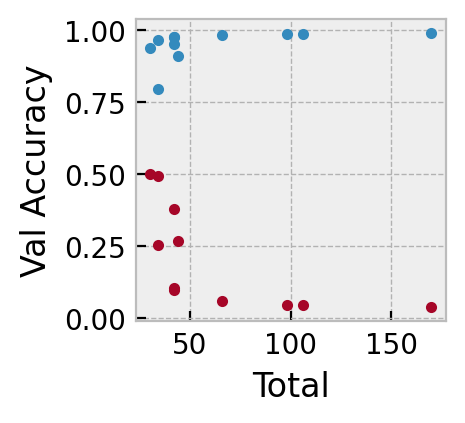

In [9]:
# layers, parameters and output accuracy and loss recorded
task1_data = {'Conv2D':  [32, 32, 24, 24, 24, 16, 10, 16, 24, 24, 20],
        'Dense1': [128, 64, 64, 32, 0, 16, 10, 8, 8, 10, 12],
        'Dense2': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
        'Val Accuracy': [0.9905, 0.9866, 0.9857, 0.9829, 0.7969, 0.9754, 0.9363, 0.9645, 0.9536, 0.9115, 0.9758],
        'Val Loss': [0.0360, 0.0437, 0.0453, 0.0586, 0.4924, 0.0971, 0.5011, 0.2545, 0.3790, 0.2658, 0.1044]
        }

# create a pandas dataframe for simplicity
df1 = pd.DataFrame(task1_data)
# calculate total of varied parameters
df1['Total'] = df1[['Conv2D','Dense1', 'Dense2']].sum(axis=1)
df1 = df1.sort_values(by=['Total'])
# output data
print(df1)

# plot total varied parameters against validation accuracy
plt.figure(figsize=(2, 2))
plt.plot(df1['Total'], df1['Val Accuracy'], '.');
plt.plot(df1['Total'], df1['Val Loss'], '.');
plt.xlabel('Total')
plt.ylabel('Val Accuracy');

### Final Network Parameters and Evaluation

The best network chosen was one with 32 filters in the convolutional layer and 32 units in the hidden dense layer. The kernel size was also increased to (5,5) from (3,3) in the initial experimentation. 

Finally, the model can be trained using these parameters. 10 epochs are sufficient for this particular task to allow the loss and accuracy to converge. 

In [10]:
# fit the model to the provided original MNIST training images with 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5294 - accuracy: 0.8237 - val_loss: 0.0874 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2681 - accuracy: 0.9135 - val_loss: 0.0652 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2263 - accuracy: 0.9254 - val_loss: 0.0522 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1998 - accuracy: 0.9349 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1880 - accuracy: 0.9375 - val_loss: 0.0441 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1756 - accuracy: 0.9421 - val_loss: 0.0420 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1637 - accuracy: 0.9448 - val_loss: 0.0417 -

In [11]:
# output accuracy and loss of model evaluated with MNIST test images 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0416 - accuracy: 0.9881


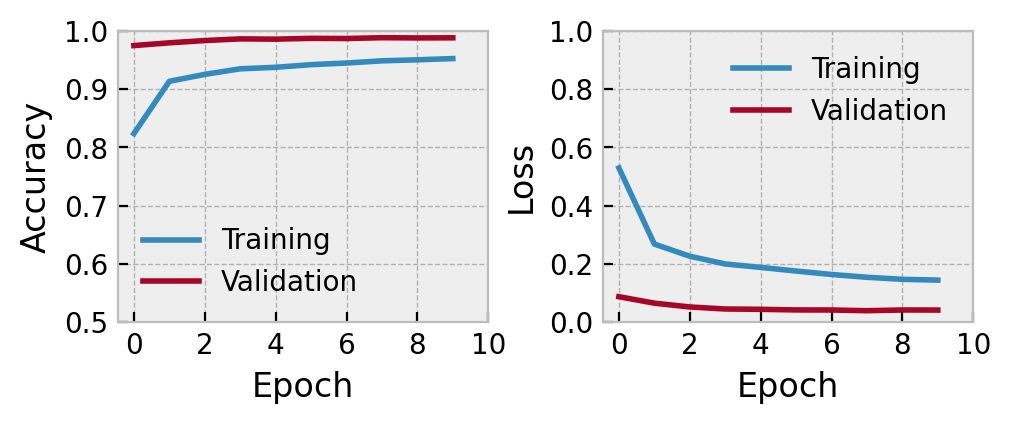

In [12]:
# create new figure with 2 subplots
fig,ax = plt.subplots(1, 2, figsize=(5,2))
# prevent overlap of subplots
plt.tight_layout()

# first subplot to display validation and training accuracy against epochs
ax[0].plot(history.history['accuracy'], label='Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
# axis labels and legend
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
# alter default axis limits and ticks
ax[0].set_ylim([0.5, 1.0])
ax[0].set_xticks([0,2,4,6,8,10])

# second subplot to display validation and training loss against epochs
ax[1].plot(history.history['loss'], label='Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
# axis labels and legend
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
# alter default axis limits and ticks
ax[1].set_ylim([0.0, 1.0])
ax[1].set_xticks([0,2,4,6,8,10]);

**Conclusion**

As we can see, we are able to obtain a training accuracy of over 95% and validation accuracy over 98% with the specified model. Note minor discrepancies in the exact values vary over each running iteration. Similarly, we also observe that a training loss of <0.2 and validation loss of <0.05 is also achieved. 

## Task 2: >1 Convolutional Layer

### Create Neural Network

For this task, we add a convolutional layer with 32 filters after the `MaxPooling2D` layer, keeping the rest of the network the same as above as this gave a good performance and efficiency. 

In [13]:
# create sequential model
model = keras.Sequential()

# specify layers to add to model
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
# compile model and specify the loss function, optimizer and metrics used in monitoring the training
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [15]:
# summarise the layers, output shape and parameters of the network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                65568     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

As before, we can experiment with the various parameters and evaluate the effect of these on the overall accuracy and loss.

   Conv2D1  Conv2D2  Dense1  Dense2  Val Accuracy  Val Loss  Total
3       16        8       8      10        0.9682    0.1528     42
2       32       16      16      10        0.9834    0.0709     74
1       32       32      32      10        0.9909    0.0331    106
0       32       64     128      10        0.9905    0.0314    234


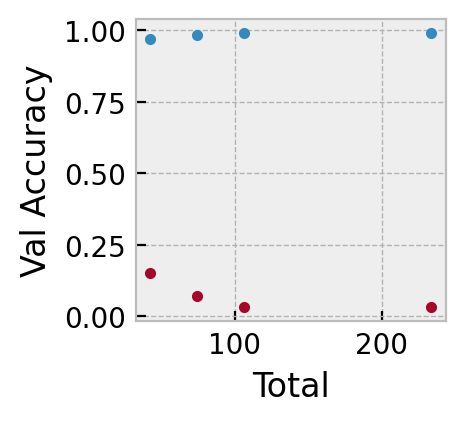

In [16]:
# layers, parameters and output accuracy and loss recorded
task2_data = {'Conv2D1':  [32, 32, 32, 16],
              'Conv2D2':  [64, 32, 16, 8],
        'Dense1': [128, 32, 16, 8],
        'Dense2': [10, 10, 10, 10],
        'Val Accuracy': [0.9905, 0.9909, 0.9834, 0.9682],
        'Val Loss': [0.0314, 0.0331, 0.0709, 0.1528]
        }

# create a pandas dataframe for simplicity
df2 = pd.DataFrame(task2_data)
# calculate total of varied parameters
df2['Total'] = df2[['Conv2D1', 'Conv2D2', 'Dense1', 'Dense2']].sum(axis=1)
df2 = df2.sort_values(by=['Total'])
# output data
print(df2)

# plot total varied parameters against validation accuracy
plt.figure(figsize=(2, 2))
plt.plot(df2['Total'], df2['Val Accuracy'], '.');
plt.plot(df2['Total'], df2['Val Loss'], '.');
plt.xlabel('Total')
plt.ylabel('Val Accuracy');

### Final Network Parameters and Evaluation

The best network chosen was one with 32 filters in both convolutional layer and 32 units in the hidden dense layer. The kernel size was also increased to (5,5) from (3,3) in the initial experimentation. 

Finally, the model can be trained using these parameters again with 10 epochs.

In [17]:
# fit the model to the provided original MNIST training images with 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4251 - accuracy: 0.8613 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1854 - accuracy: 0.9403 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1464 - accuracy: 0.9536 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1240 - accuracy: 0.9601 - val_loss: 0.0319 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1121 - accuracy: 0.9640 - val_loss: 0.0289 - val_accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1037 - accuracy: 0.9670 - val_loss: 0.0268 - val_accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0938 - accuracy: 0.9695 - val_loss: 0.0305 -

In [18]:
# output accuracy and loss of model evaluated with MNIST test images 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0298 - accuracy: 0.9924


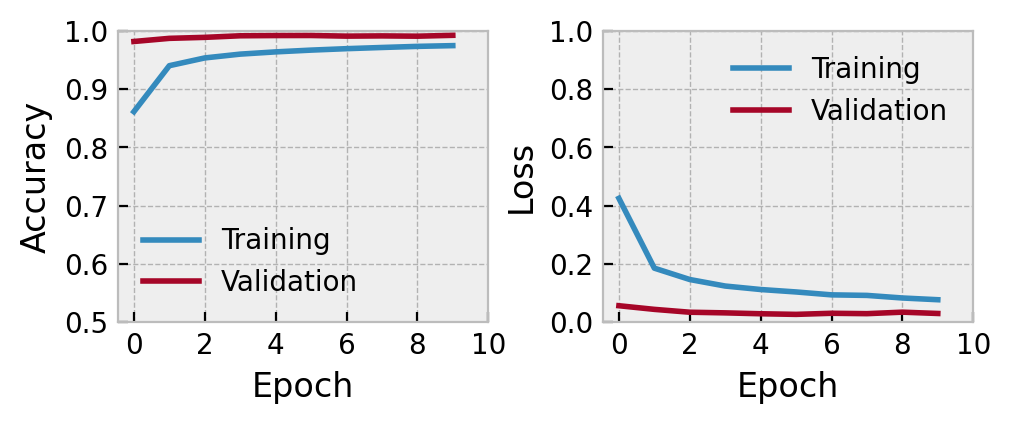

In [19]:
# create new figure with 2 subplots
fig,ax = plt.subplots(1, 2, figsize=(5,2))
# prevent overlap of subplots
plt.tight_layout()

# first subplot to display validation and training accuracy against epochs
ax[0].plot(history.history['accuracy'], label='Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
# axis labels and legend
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
# alter default axis limits and ticks
ax[0].set_ylim([0.5, 1.0])
ax[0].set_xticks([0,2,4,6,8,10])

# second subplot to display validation and training loss against epochs
ax[1].plot(history.history['loss'], label='Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
# axis labels and legend
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
# alter default axis limits and ticks
ax[1].set_ylim([0.0, 1.0])
ax[1].set_xticks([0,2,4,6,8,10]);

**Conclusion**

We see that by adding an additional convolutional layer, we are able to improve the performance of our network given the same number of epochs. We obtain a training accuracy of over 95% and validation accuracy over 99% with the specified model. We are also able to reduce the loss with a training loss of < 0.1 and a validation of loss of < 0.03. 

## Summary

From this notebook, we see that using a single convolutional layer, we are able to achieve a a good accuracy and loss on the MNIST images in 10 epochs, which can be further improved by adding another convolutional layer to improve these results even further. 